In [2]:
%pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [18]:
df_2015 = pd.read_csv('./2015.csv')
df_2015 = df_2015[['Country', 'Region', 'Happiness Score']]
df_2015 = df_2015.rename(columns={"Happiness Score": "Happiness_Score_2015"})
df_2015.head()

,Country,Region,Happiness_Score_2015
0,Switzerland,Western Europe,7.587
1,Iceland,Western Europe,7.561
2,Denmark,Western Europe,7.527
3,Norway,Western Europe,7.522
4,Canada,North America,7.427


In [22]:
df_2016 = pd.read_csv('./2016.csv')
df_2016 = df_2016[['Country', 'Happiness Score']]
df_2016 = df_2016.rename(columns={"Happiness Score": "Happiness_Score_2016"})
df_2016.head()

,Country,Happiness_Score_2016
0,Denmark,7.526
1,Switzerland,7.509
2,Iceland,7.501
3,Norway,7.498
4,Finland,7.413


In [21]:
df_2017 = pd.read_csv('./2017.csv')
df_2017 = df_2017[['Country', 'Happiness.Score']]
df_2017 = df_2017.rename(columns={"Happiness.Score": "Happiness_Score_2017"})
df_2017.head()

,Country,Happiness_Score_2017
0,Norway,7.537
1,Denmark,7.522
2,Iceland,7.504
3,Switzerland,7.494
4,Finland,7.469


In [23]:
df_2018 = pd.read_csv('./2018.csv')
df_2018 = df_2018[['Country or region', 'Score']]
df_2018 = df_2018.rename(columns={"Score": "Happiness_Score_2018", "Country or region": "Country"})
df_2018.head()

,Country,Happiness_Score_2018
0,Finland,7.632
1,Norway,7.594
2,Denmark,7.555
3,Iceland,7.495
4,Switzerland,7.487


In [24]:
df_2019 = pd.read_csv('./2019.csv')
df_2019 = df_2019[['Country or region', 'Score']]
df_2019 = df_2019.rename(columns={"Score": "Happiness_Score_2019", "Country or region": "Country"})
df_2019.head()

,Country,Happiness_Score_2019
0,Finland,7.769
1,Denmark,7.600
2,Norway,7.554
3,Iceland,7.494
4,Netherlands,7.488


In [27]:
dataframe = pd.merge(df_2015, df_2016, on="Country")
dataframe = pd.merge(dataframe, df_2017, on="Country")
dataframe = pd.merge(dataframe, df_2018, on="Country")
dataframe = pd.merge(dataframe, df_2019, on="Country")

dataframe.head()

,Country,Region,Happiness_Score_2015,Happiness_Score_2016,Happiness_Score_2017,Happiness_Score_2018,Happiness_Score_2019
0,Switzerland,Western Europe,7.587,7.509,7.494,7.487,7.480
1,Iceland,Western Europe,7.561,7.501,7.504,7.495,7.494
2,Denmark,Western Europe,7.527,7.526,7.522,7.555,7.600
3,Norway,Western Europe,7.522,7.498,7.537,7.594,7.554
4,Canada,North America,7.427,7.404,7.316,7.328,7.278


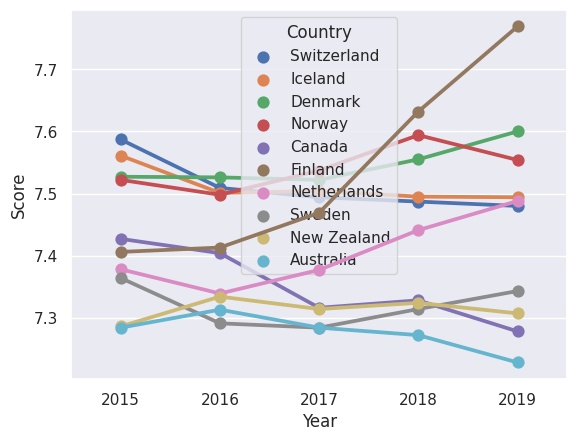

In [43]:
dataframe_top10 = dataframe.iloc[:10]

dataframe_top10 = dataframe_top10.drop(columns=['Region'])
dataframe_top10 = dataframe_top10.rename(columns={
    "Happiness_Score_2015": "2015",
    "Happiness_Score_2016": "2016",
    "Happiness_Score_2017": "2017",
    "Happiness_Score_2018": "2018",
    "Happiness_Score_2019": "2019",
})


dataframe_top10 = dataframe_top10.melt('Country', var_name='Year', value_name='Score')
dataframe_top10.head()

sns.pointplot(data=dataframe_top10, x="Year", y="Score", hue="Country")
plt.show()


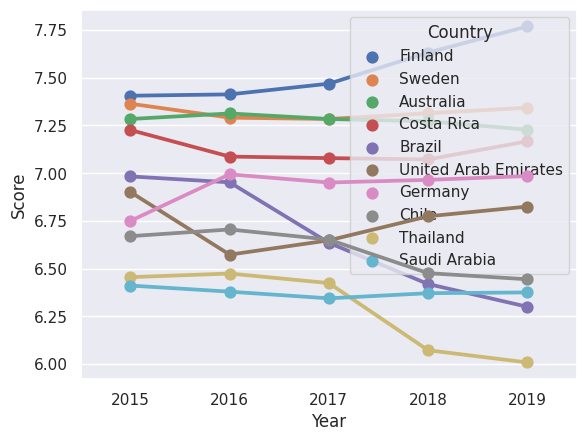

In [108]:
dataframe_analyse = dataframe

dataframe_analyse = dataframe_analyse.drop(columns=['Region'])
dataframe_analyse = dataframe_analyse.rename(columns={
    "Happiness_Score_2015": "2015",
    "Happiness_Score_2016": "2016",
    "Happiness_Score_2017": "2017",
    "Happiness_Score_2018": "2018",
    "Happiness_Score_2019": "2019",
})
dataframe_analyse = dataframe_analyse.melt('Country', var_name='Year', value_name='Score')



dataframe_analyse.groupby(['Country'])['Score'].sum().pct_change()
dataframe_analyse.groupby(['Country'])['Score'].sum().pct_change().sort_values(ascending=False)


dataframe_analyse_10 = dataframe_analyse.groupby(['Country'])['Score'].sum().pct_change().sort_values(ascending=False).iloc[:10]
top_10_growth_countries = dataframe_analyse_10.index.values

top_10_growth_countries_df = dataframe_analyse.loc[dataframe_analyse['Country'].isin(top_10_growth_countries), :]
sns.pointplot(data=top_10_growth_countries_df, x="Year", y="Score", hue="Country")
plt.show()
